<a href="https://colab.research.google.com/github/acruzappdev/benjote/blob/main/TestBenji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests

In [13]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=1XT9BWZDP18ZCG4X'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'TSLA', '3. Last Refreshed': '2024-07-02 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-07-02 19:55:00': {'1. open': '230.6100', '2. high': '231.0800', '3. low': '230.6100', '4. close': '231.0800', '5. volume': '83496'}, '2024-07-02 19:50:00': {'1. open': '230.6200', '2. high': '230.8000', '3. low': '230.5800', '4. close': '230.6100', '5. volume': '61233'}, '2024-07-02 19:45:00': {'1. open': '230.4900', '2. high': '230.6700', '3. low': '230.4400', '4. close': '230.6200', '5. volume': '51920'}, '2024-07-02 19:40:00': {'1. open': '230.4600', '2. high': '230.4900', '3. low': '230.3600', '4. close': '230.4110', '5. volume': '21949'}, '2024-07-02 19:35:00': {'1. open': '230.5700', '2. high': '230.6000', '3. low': '230.3950', '4. close': '230.4200', '5. volume': '39624'}, '2024-07-02 19:30:00': {'1. open': '230.4

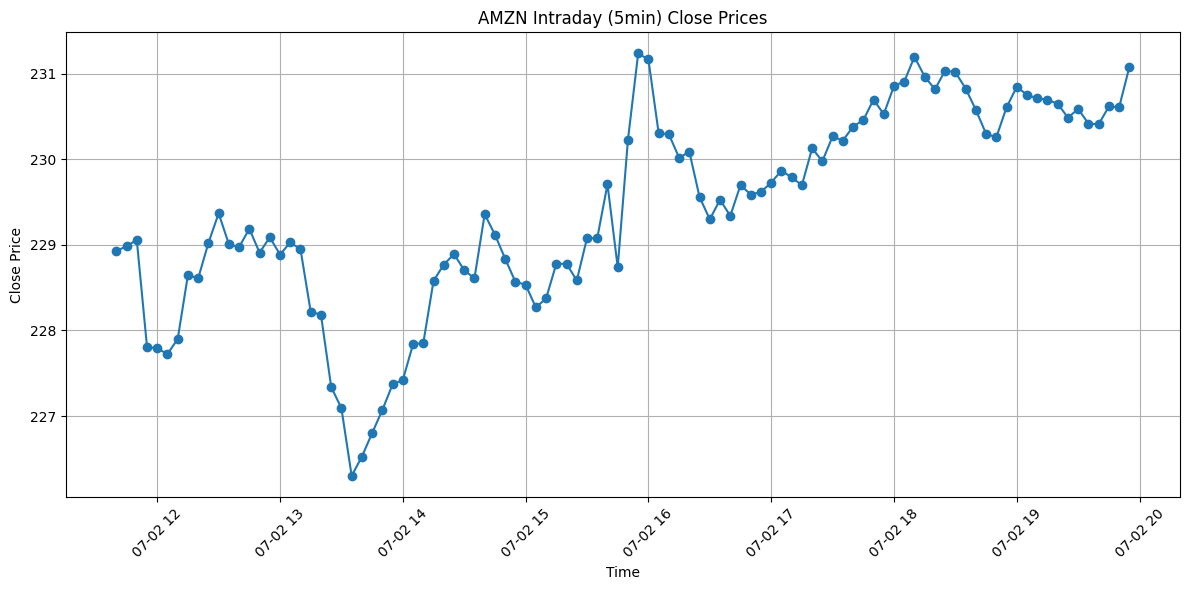

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Extracting time series data
time_series = data['Time Series (5min)']

# Converting to a pandas DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Convert columns to numeric
df = df.apply(pd.to_numeric)

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['4. close'], marker='o', linestyle='-')
plt.title('AMZN Intraday (5min) Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [16]:
import pandas as pd
# Converting to a pandas DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Convert columns to numeric
df = df.apply(pd.to_numeric)

# Calculate percentage change in closing prices
df['percent_change'] = df['4. close'].pct_change() * 100

# Calculate the number of times a 5% increase happens
num_x_percent_increases = (df['percent_change'] >= 0.5).sum()

print(f"Number of times a x% increase happens: {num_x_percent_increases}")

Number of times a x% increase happens: 1


In [20]:
# Extracting time series data
time_series = data['Time Series (5min)']

# Converting to a pandas DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Convert columns to numeric
df = df.apply(pd.to_numeric)

# Function to find the time it takes for a 2% increase to occur
def time_to_2_percent_increase(df):
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            if (df['4. close'].iloc[j] >= df['4. close'].iloc[i] * 1.02):
                start_time = df.index[i]
                end_time = df.index[j]
                time_taken = end_time - start_time
                return start_time, end_time, time_taken
    return None, None, None

# Calculate the time to 2% increase
start_time, end_time, time_taken = time_to_2_percent_increase(df)

if start_time and end_time:
    print(f"The 2% increase happens from {start_time} to {end_time}, taking {time_taken}.")
else:
    print("No 2% increase found in the time series data.")

The 2% increase happens from 2024-07-02 13:35:00 to 2024-07-02 15:55:00, taking 0 days 02:20:00.
